<a href="https://www.kaggle.com/code/okekesamsonmichael/mitronbank-customer-spending-behavior?scriptVersionId=156647809" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Imprting the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [45]:
# Loading the two dataset for analysis

dim_customers = pd.read_csv("/kaggle/input/dim-customers/dim_customers.csv")
fact_spends = pd.read_csv("/kaggle/input/fact-spends/fact_spends.csv")


In [46]:
dim_customers.head()

,customer_id,age_group,city,occupation,gender,marital status,avg_income
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523
1,ATQCUS0809,25-34,Hyderabad,Salaried Other Employees,Male,Married,39922
2,ATQCUS0663,25-34,Chennai,Salaried Other Employees,Male,Married,37702
3,ATQCUS0452,25-34,Delhi NCR,Government Employees,Male,Married,54090
4,ATQCUS3350,21-24,Bengaluru,Freelancers,Male,Single,28376


In [47]:
dim_customers.shape

(4000, 7)

In [48]:
fact_spends.head()

,customer_id,month,category,payment_type,spend
0,ATQCUS1371,July,Health & Wellness,Credit Card,1114
1,ATQCUS0368,October,Groceries,Credit Card,1466
2,ATQCUS0595,May,Health & Wellness,Credit Card,387
3,ATQCUS0667,October,Electronics,Credit Card,1137
4,ATQCUS3477,September,Bills,UPI,2102


In [49]:
fact_spends.shape

(864000, 5)

In [50]:
# Merging our Dataset 

merged_data = pd.merge(fact_spends, dim_customers, on="customer_id")

In [51]:
merged_data.head()

,customer_id,month,category,payment_type,spend,age_group,city,occupation,gender,marital status,avg_income
0,ATQCUS1371,July,Health & Wellness,Credit Card,1114,35-45,Chennai,Salaried IT Employees,Male,Married,64696
1,ATQCUS1371,May,Bills,UPI,787,35-45,Chennai,Salaried IT Employees,Male,Married,64696
2,ATQCUS1371,September,Bills,Net Banking,1022,35-45,Chennai,Salaried IT Employees,Male,Married,64696
3,ATQCUS1371,September,Bills,UPI,1942,35-45,Chennai,Salaried IT Employees,Male,Married,64696
4,ATQCUS1371,August,Electronics,Credit Card,1865,35-45,Chennai,Salaried IT Employees,Male,Married,64696


In [52]:
merged_data.shape

(864000, 11)

# Exploratory Analysis

In [53]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864000 entries, 0 to 863999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   customer_id     864000 non-null  object
 1   month           864000 non-null  object
 2   category        864000 non-null  object
 3   payment_type    864000 non-null  object
 4   spend           864000 non-null  int64 
 5   age_group       864000 non-null  object
 6   city            864000 non-null  object
 7   occupation      864000 non-null  object
 8   gender          864000 non-null  object
 9   marital status  864000 non-null  object
 10  avg_income      864000 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 72.5+ MB


In [54]:
def convert_age_group(age_group):
    if '+' in age_group:
        return int(age_group.replace('+', ''))
    elif '-' in age_group:
        age_range = age_group.split('-')
        return (int(age_range[0]) + int(age_range[1])) / 2
    else:
        return None  

merged_data['age_numeric'] = merged_data['age_group'].apply(convert_age_group)

merged_data = merged_data.drop('age_group', axis=1)

merged_data.head()


,customer_id,month,category,payment_type,spend,city,occupation,gender,marital status,avg_income,age_numeric
0,ATQCUS1371,July,Health & Wellness,Credit Card,1114,Chennai,Salaried IT Employees,Male,Married,64696,40.0
1,ATQCUS1371,May,Bills,UPI,787,Chennai,Salaried IT Employees,Male,Married,64696,40.0
2,ATQCUS1371,September,Bills,Net Banking,1022,Chennai,Salaried IT Employees,Male,Married,64696,40.0
3,ATQCUS1371,September,Bills,UPI,1942,Chennai,Salaried IT Employees,Male,Married,64696,40.0
4,ATQCUS1371,August,Electronics,Credit Card,1865,Chennai,Salaried IT Employees,Male,Married,64696,40.0


In [55]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864000 entries, 0 to 863999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   customer_id     864000 non-null  object 
 1   month           864000 non-null  object 
 2   category        864000 non-null  object 
 3   payment_type    864000 non-null  object 
 4   spend           864000 non-null  int64  
 5   city            864000 non-null  object 
 6   occupation      864000 non-null  object 
 7   gender          864000 non-null  object 
 8   marital status  864000 non-null  object 
 9   avg_income      864000 non-null  int64  
 10  age_numeric     864000 non-null  float64
dtypes: float64(1), int64(2), object(8)
memory usage: 72.5+ MB


In [56]:
print("Basic Statistics for Spends:")
print(merged_data['spend'].describe())

print("\nBasic Statistics for Average Income:")
print(dim_customers['avg_income'].describe())

print()

Basic Statistics for Spends:
count    864000.000000
mean        614.464994
std         661.571676
min           6.000000
25%         191.000000
50%         395.000000
75%         793.000000
max       10313.000000
Name: spend, dtype: float64

Basic Statistics for Average Income:
count     4000.000000
mean     51657.032250
std      14690.140645
min      24816.000000
25%      38701.000000
50%      50422.000000
75%      64773.250000
max      86600.000000
Name: avg_income, dtype: float64



1)Spending Analysis: 
The spending data's wide range from 6.00 to 10,313.00, along with a substantial standard deviation of 661.57, suggests diverse spending habits within the dataset. The presence of extreme values could be due to outliers or different spending behaviors among individuals or entities represented in the data.

2)Average Income Analysis: 
The dataset's moderate variability, with a standard deviation of approximately 14,690.14,and a broad range from 24,816.00 to 86,600.00, indicates a degree of diversity or volatility in the numerical values. Factors contributing to this variability could include different economic conditions, financial performances,or other external influences affecting the measured values.

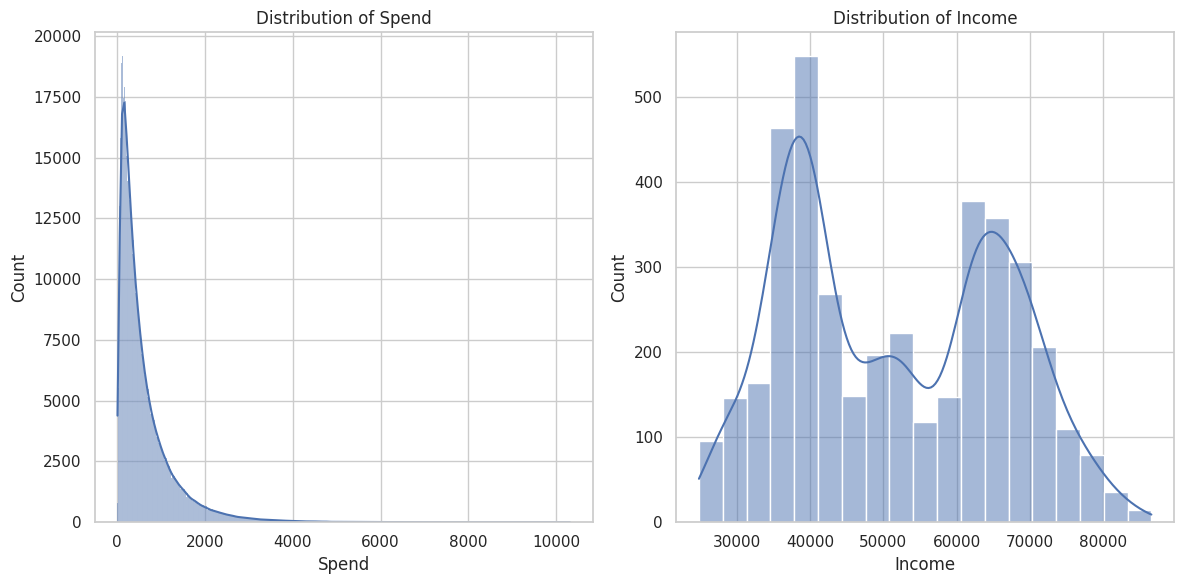

In [57]:
# Distribution Plots

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(merged_data['spend'], kde=True)
plt.title('Distribution of Spend')
plt.xlabel('Spend')

plt.subplot(1, 2, 2)
sns.histplot(dim_customers['avg_income'], kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income')

plt.tight_layout()
plt.show()

The dual-panel histogram visualizes the distribution of spending and average income. On the left, spending exhibits a skewed distribution with a notable peak, indicating a concentration of lower spending values. On the right, the income distribution is smoother, suggesting a more balanced spread across income levels. The visualization provides a clear snapshot of the spending and income patterns in the dataset

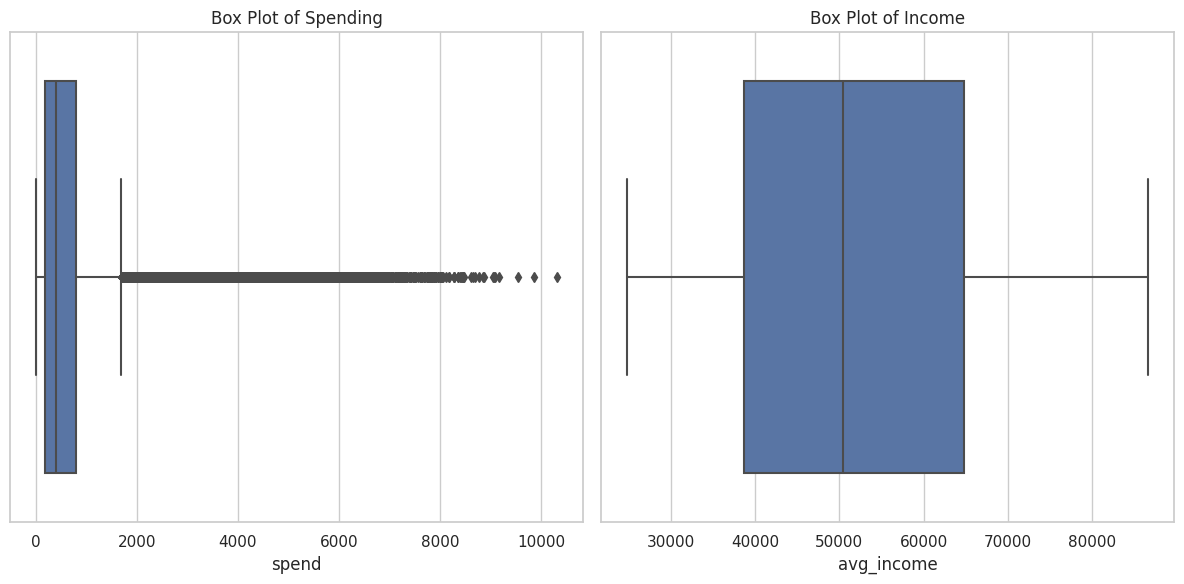

In [58]:
# Box Plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='spend', data=merged_data)
plt.title('Box Plot of Spending')

plt.subplot(1, 2, 2)
sns.boxplot(x='avg_income', data=dim_customers)
plt.title('Box Plot of Income')

plt.tight_layout()
plt.show()

The paired box plots provide a visual representation of the spending and income distributions. On the left, the box plot for spending highlights a wide range of values with several outliers, indicating varying spending patterns among the entities in the dataset. On the right, the income box plot illustrates a more consistent distribution with fewer extreme values, suggesting a comparatively stable spread across income levels

In [59]:
merged_data.head()

,customer_id,month,category,payment_type,spend,city,occupation,gender,marital status,avg_income,age_numeric
0,ATQCUS1371,July,Health & Wellness,Credit Card,1114,Chennai,Salaried IT Employees,Male,Married,64696,40.0
1,ATQCUS1371,May,Bills,UPI,787,Chennai,Salaried IT Employees,Male,Married,64696,40.0
2,ATQCUS1371,September,Bills,Net Banking,1022,Chennai,Salaried IT Employees,Male,Married,64696,40.0
3,ATQCUS1371,September,Bills,UPI,1942,Chennai,Salaried IT Employees,Male,Married,64696,40.0
4,ATQCUS1371,August,Electronics,Credit Card,1865,Chennai,Salaried IT Employees,Male,Married,64696,40.0


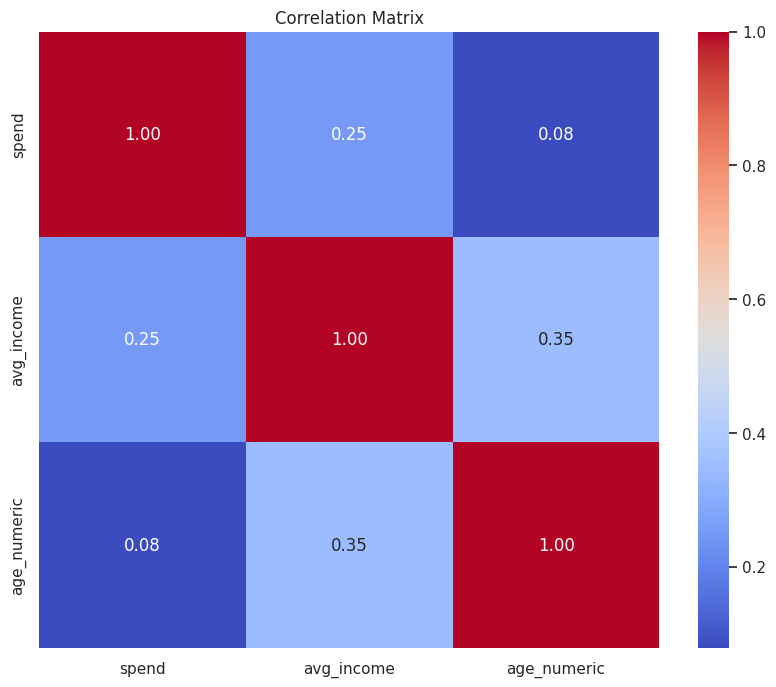

In [60]:
# Correlation matrix
numeric_columns = merged_data.select_dtypes(include=['float64','int64']).columns
correlation_matrix = merged_data[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


The correlation matrix reveals relationships between "Spend," "average_income," and "age_numeric." A moderate positive correlation (0.25) exists between spending and average income, suggesting that as income increases, spending tends to rise moderately. The correlation between spending and age_numeric is weak (0.08), indicating a subtle tendency for spending to increase slightly with age. A moderate positive correlation (0.35) exists between average income and age_numeric, suggesting that as age increases, there is a moderate rise in average income.

# Demographic Analysis

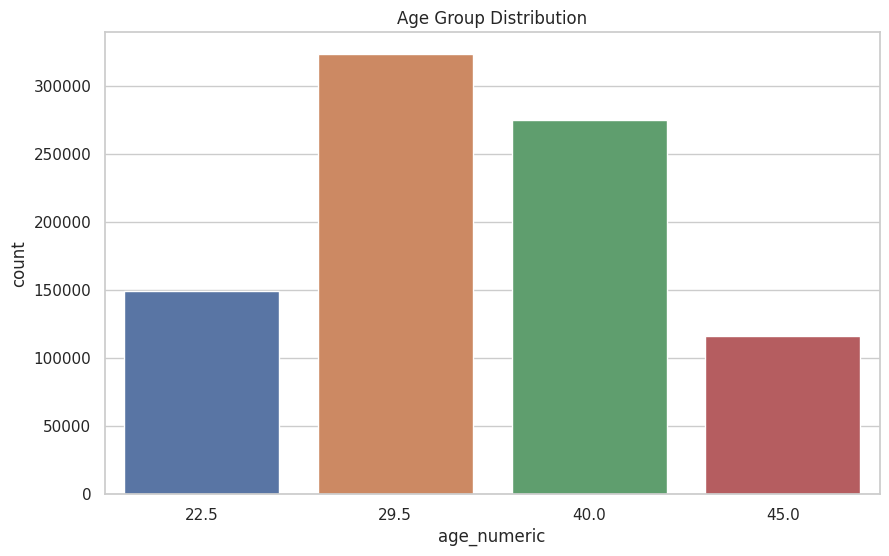

In [61]:
# Age Group Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='age_numeric', data=merged_data)
plt.title('Age Group Distribution')
plt.show()

The Age Group Distribution plot indicates that individuals around the age of 29.5 have the highest counts in the dataset. This could be due to several reasons, such as a higher representation of individuals from this specific age group in the sampled population or data collection biases. The peaks or valleys in the histogram indicate the prevalence or scarcity of customers within specific age ranges, offering insights into the demographic composition of the dataset.

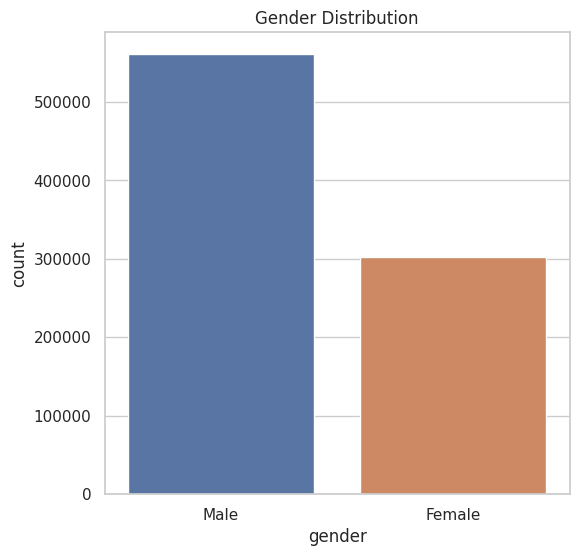

In [62]:
# Gender Distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='gender', data=merged_data)
plt.title('Gender Distribution')
plt.show()

The gender distribution plot reveals that there is a higher representation of male customers in the dataset, as indicated by the predominance of the "Male" category. This could be attributed to factors such as the nature of the products or services offered, marketing strategies that appeal more to male demographics, or specific industry trends that attract a larger male customer base

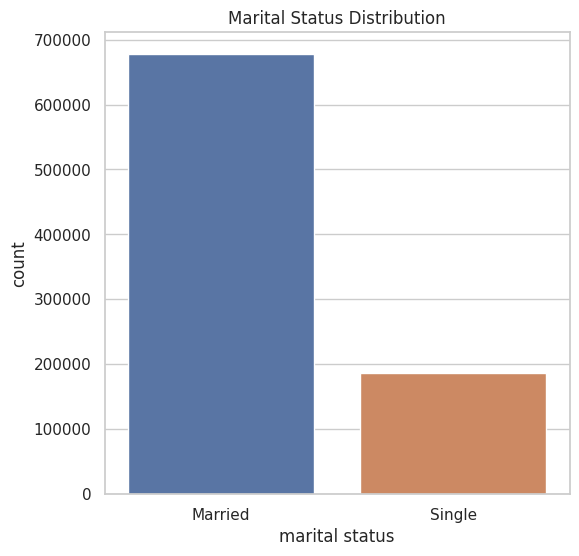

In [63]:
# 1. Marital Status Distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='marital status', data=merged_data)
plt.title('Marital Status Distribution')
plt.show()

The Marital Status Distribution plot indicates that the "Married" category is more prominent compared to the single status. This outcome suggests that a larger proportion of individuals in the dataset are married, possibly reflecting a demographic skew towards married individuals

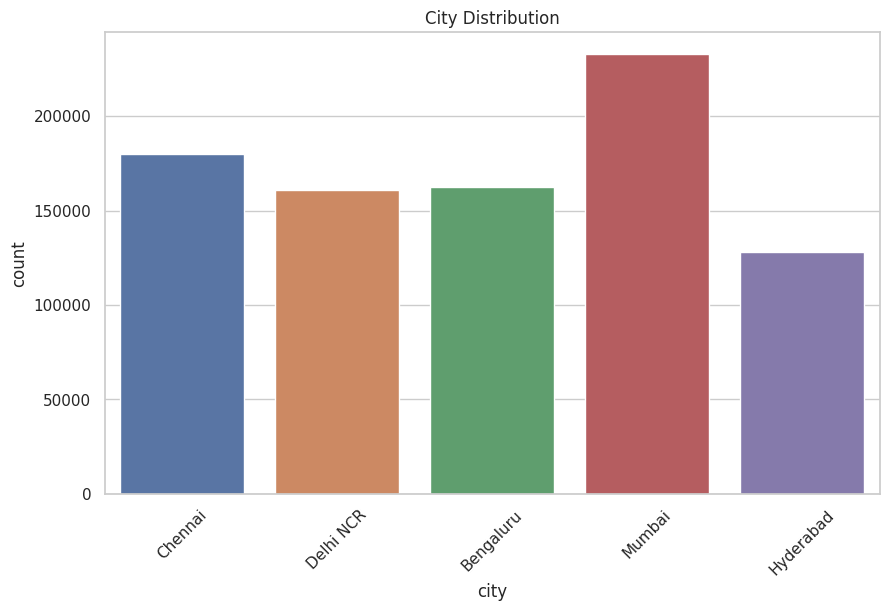

In [64]:
# 2. City Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='city', data=merged_data)
plt.title('City Distribution')
plt.xticks(rotation=45)
plt.show()

This higher count of Mumbai in the City Distribution plot suggests that the dataset may be biased towards or oversampled from Mumbai compared to other cities. This could be due to a variety of factors such as a higher customer base, increased market penetration, or targeted data collection efforts in Mumbai. 

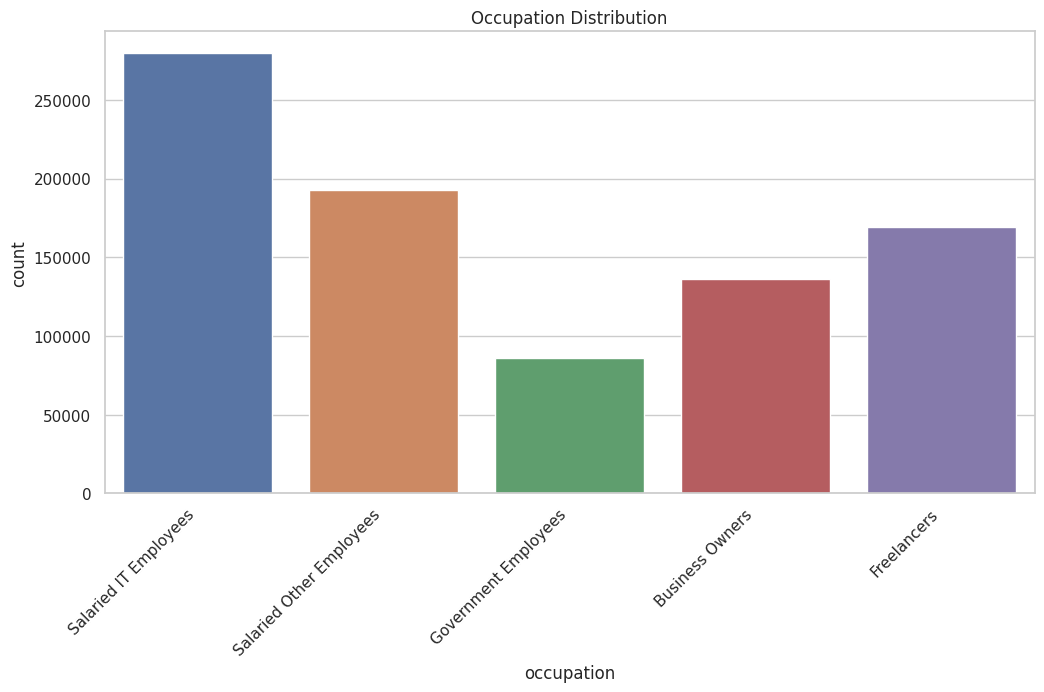

In [65]:
# 3. Occupation Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='occupation', data=merged_data)
plt.title('Occupation Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()

The preeminent count of Salaried IT Employees suggests that a substantial proportion of the customer base is employed in the Information Technology sector. This dominance could be attributed to various factors, such as the dataset's source being an IT-focused platform or the broader prevalence of IT-related occupations in the analyzed demographic.

# Average Income Utilization 

In [66]:
merged_data.head()

,customer_id,month,category,payment_type,spend,city,occupation,gender,marital status,avg_income,age_numeric
0,ATQCUS1371,July,Health & Wellness,Credit Card,1114,Chennai,Salaried IT Employees,Male,Married,64696,40.0
1,ATQCUS1371,May,Bills,UPI,787,Chennai,Salaried IT Employees,Male,Married,64696,40.0
2,ATQCUS1371,September,Bills,Net Banking,1022,Chennai,Salaried IT Employees,Male,Married,64696,40.0
3,ATQCUS1371,September,Bills,UPI,1942,Chennai,Salaried IT Employees,Male,Married,64696,40.0
4,ATQCUS1371,August,Electronics,Credit Card,1865,Chennai,Salaried IT Employees,Male,Married,64696,40.0


<Figure size 1200x800 with 0 Axes>

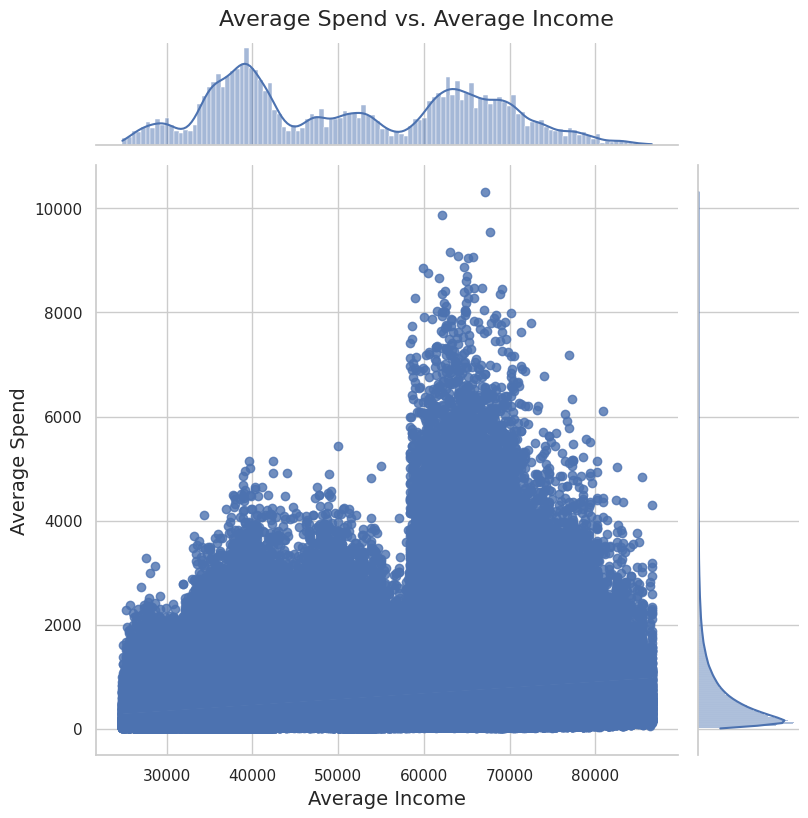

In [67]:
sns.set(style="whitegrid")

# Create a joint plot with regression line
plt.figure(figsize=(12, 8))
sns.jointplot(x='avg_income', y='spend', data=merged_data, kind='reg', height=8)

# Set title and labels
plt.suptitle('Average Spend vs. Average Income', y=1.02, fontsize=16)
plt.xlabel('Average Income', fontsize=14)
plt.ylabel('Average Spend', fontsize=14)

# Show the plot
plt.show()

The joint plot with a regression line is used to visualize the relationship between average income and spending.
The upward-sloping regression line suggests a positive correlation between average income and average spend.
This implies that customers with higher average income tend to have higher average spending, indicating a potential positive economic relationship.

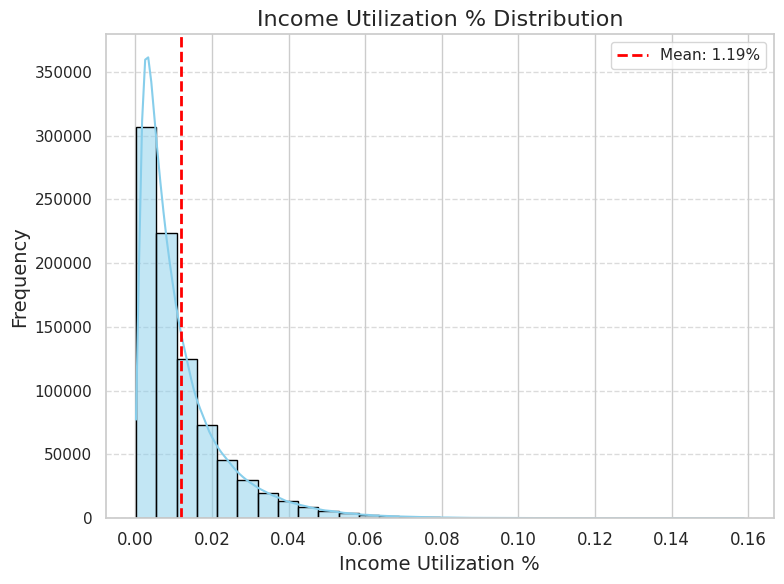

In [68]:
# Create a histogram with kernel density estimation (KDE)

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(merged_data['spend'] / merged_data['avg_income'], bins=30, kde=True, color='skyblue', edgecolor='black')

plt.title('Income Utilization % Distribution', fontsize=16)
plt.xlabel('Income Utilization %', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
mean_utilization = (merged_data['spend'] / merged_data['avg_income']).mean()
plt.axvline(mean_utilization, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_utilization:.2%}')
plt.legend()

plt.tight_layout()
plt.show()

The histogram displays the distribution of income utilization percentages, calculated as the ratio of spending to average income. The concentration of data points around 0.00 indicates that a significant portion of customers spends a negligible fraction of their average income. This outcome suggests that a considerable number of customers may have low spending relative to their income, possibly due to occasional or minimal expenditures during the observed period. The red dashed line represents the mean utilization percentage, highlighting the central tendency of the distribution.

# Spending Insights

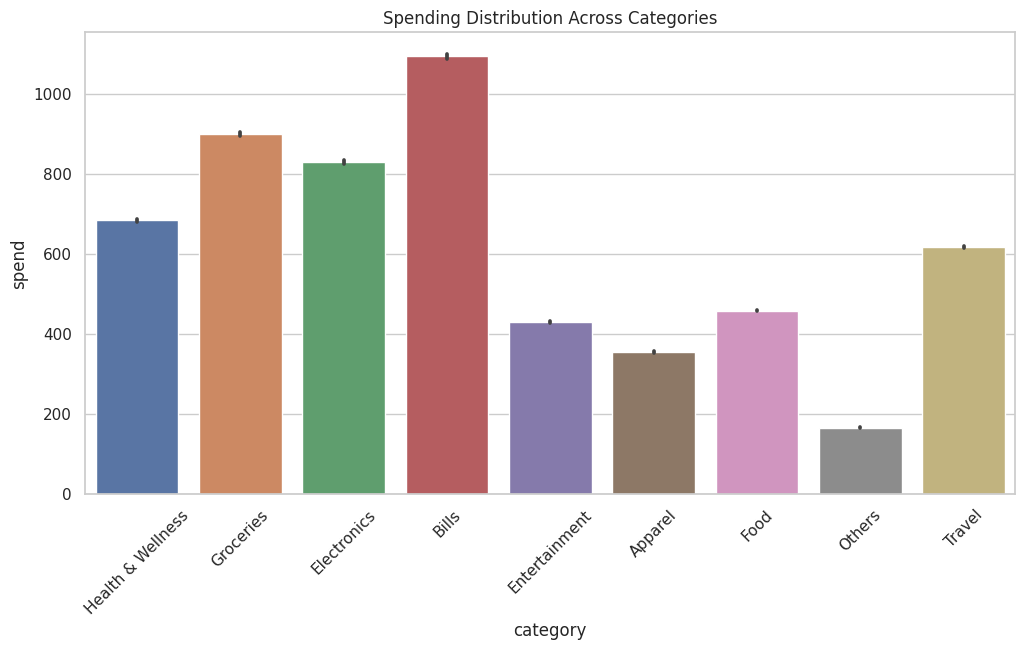

In [69]:
# Bar graphs for spending distribution across categories
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='spend', data=fact_spends)
plt.title('Spending Distribution Across Categories')
plt.xticks(rotation=45)
plt.show()

The higher distribution of spending in the "Bills" category, as observed in the bar graph, may indicate that essential expenses related to bills, such as utilities, rent, and other regular payments, constitute a significant portion of customers' overall expenditures. Customers are likely to allocate a significant portion of their budget to essential services, leading to a higher spending frequency in the "Bills" category compared to discretionary spending categories.

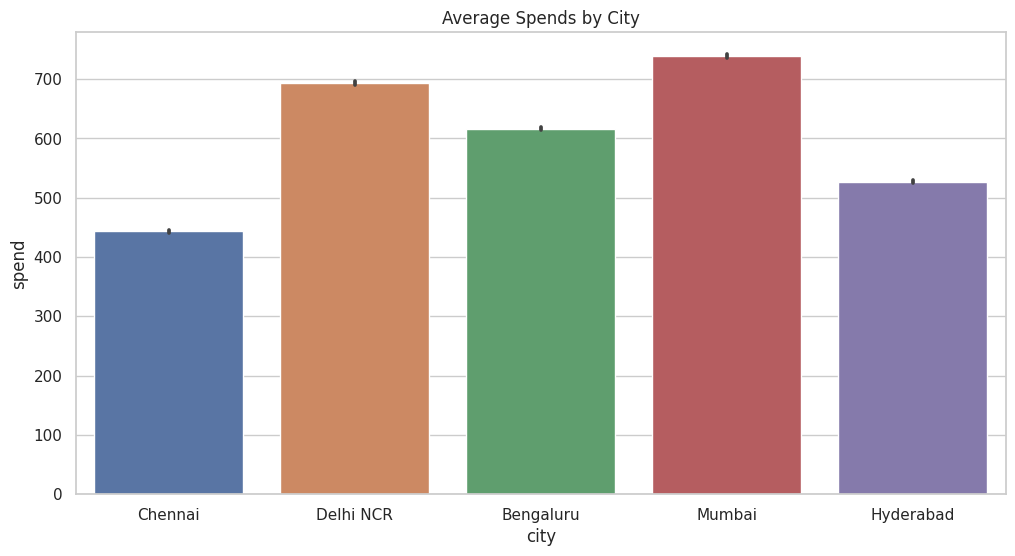

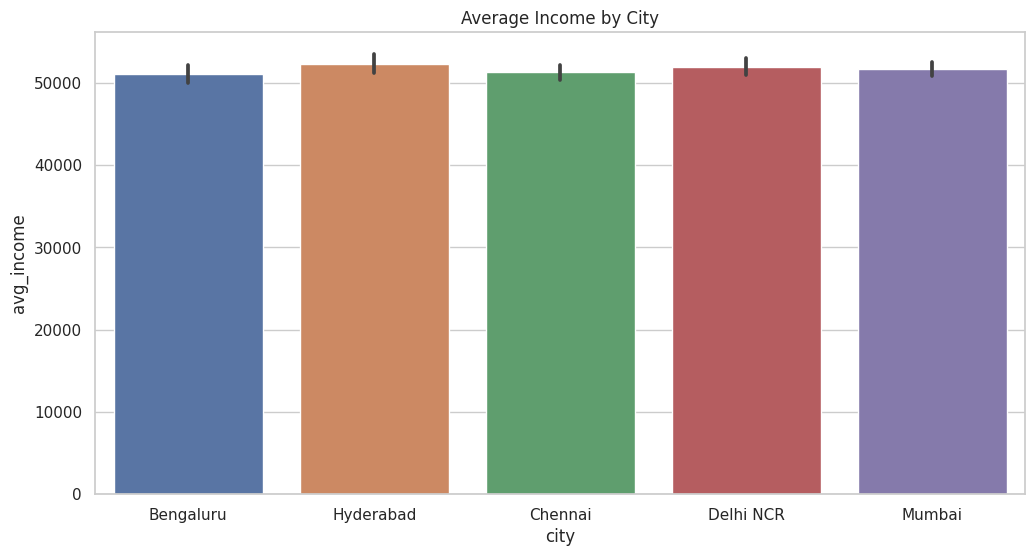

In [70]:
# City-wise Analysis
plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='spend', data=merged_data)
plt.title('Average Spends by City')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='avg_income', data=dim_customers)
plt.title('Average Income by City')
plt.show()

The higher spending in Mumbai could be attributed to various factors such as a higher cost of living, a vibrant lifestyle, or greater access to diverse spending opportunities in a metropolitan city. Conversely, the higher average income in Hyderabad might be influenced by the city's economic activities, potentially including a strong presence of high-paying industries or a lower cost of living compared to Mumbai. These observations highlight the dynamic economic and lifestyle differences between cities, contributing to variations in both spending patterns and income levels.

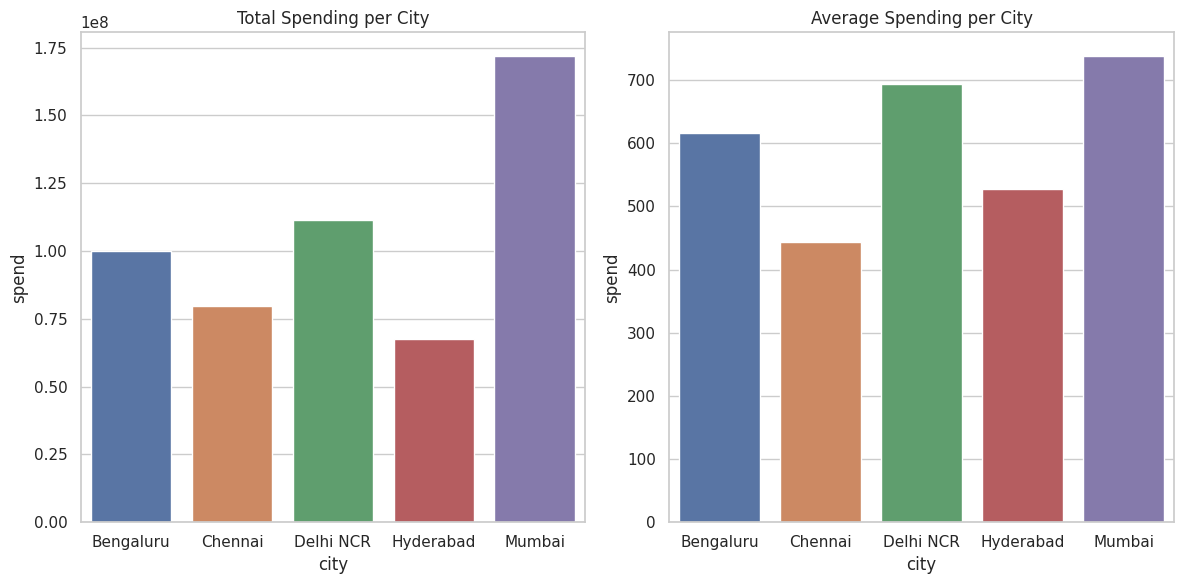

In [71]:
# Total spending per city
city_total_spending = merged_data.groupby('city')['spend'].sum().reset_index()

# Average spending per city
city_avg_spending = merged_data.groupby('city')['spend'].mean().reset_index()

# Bar chart for total and average spending per city
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='city', y='spend', data=city_total_spending)
plt.title('Total Spending per City')

plt.subplot(1, 2, 2)
sns.barplot(x='city', y='spend', data=city_avg_spending)
plt.title('Average Spending per City')

plt.tight_layout()
plt.show()

The higher total spending and average spending in Mumbai compared to other cities may be attributed to several factors. Mumbai, being a major financial and economic hub, likely has a larger population with higher income levels and diverse spending patterns. Additionally, the city's robust retail and entertainment sectors may contribute to increased consumer expenditures. Furthermore, variations in the cost of living and lifestyle preferences across cities can influence spending behavior, with Mumbai potentially having a more affluent and active consumer base.

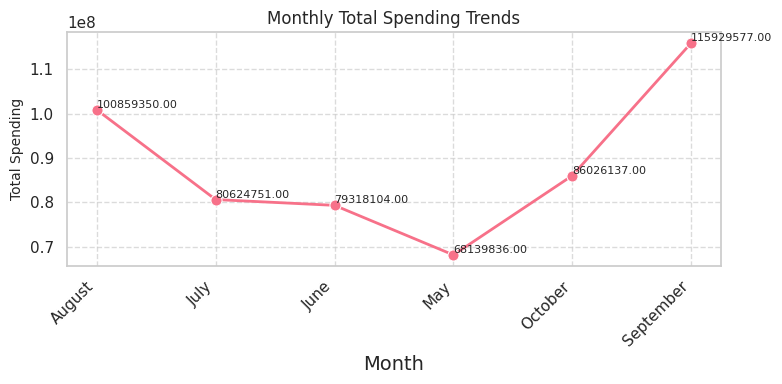

In [72]:
# Line chart for monthly spending trends

# Total spending per month
monthly_total_spending = fact_spends.groupby('month')['spend'].sum().reset_index()

# Average spending per month
monthly_avg_spending = fact_spends.groupby('month')['spend'].mean().reset_index()

sns.set(style="whitegrid")
palette = sns.color_palette("husl", n_colors=1)
plt.figure(figsize=(8, 4))
sns.lineplot(x='month', y='spend', data=monthly_total_spending, color=palette[0], marker='o', markersize=8, linewidth=2)
plt.title('Monthly Total Spending Trends', fontsize=12)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Spending', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
for index, value in monthly_total_spending.iterrows():
     plt.text(value['month'], value['spend'], f'{value["spend"]:.2f}', ha='left', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

Line chart above illustrates monthly total spending trends, with "May" showing the lowest total spending and "September" registering the highest. This pattern could be attributed to seasonal factors, economic events, or promotional activities, influencing consumer behavior and expenditure.

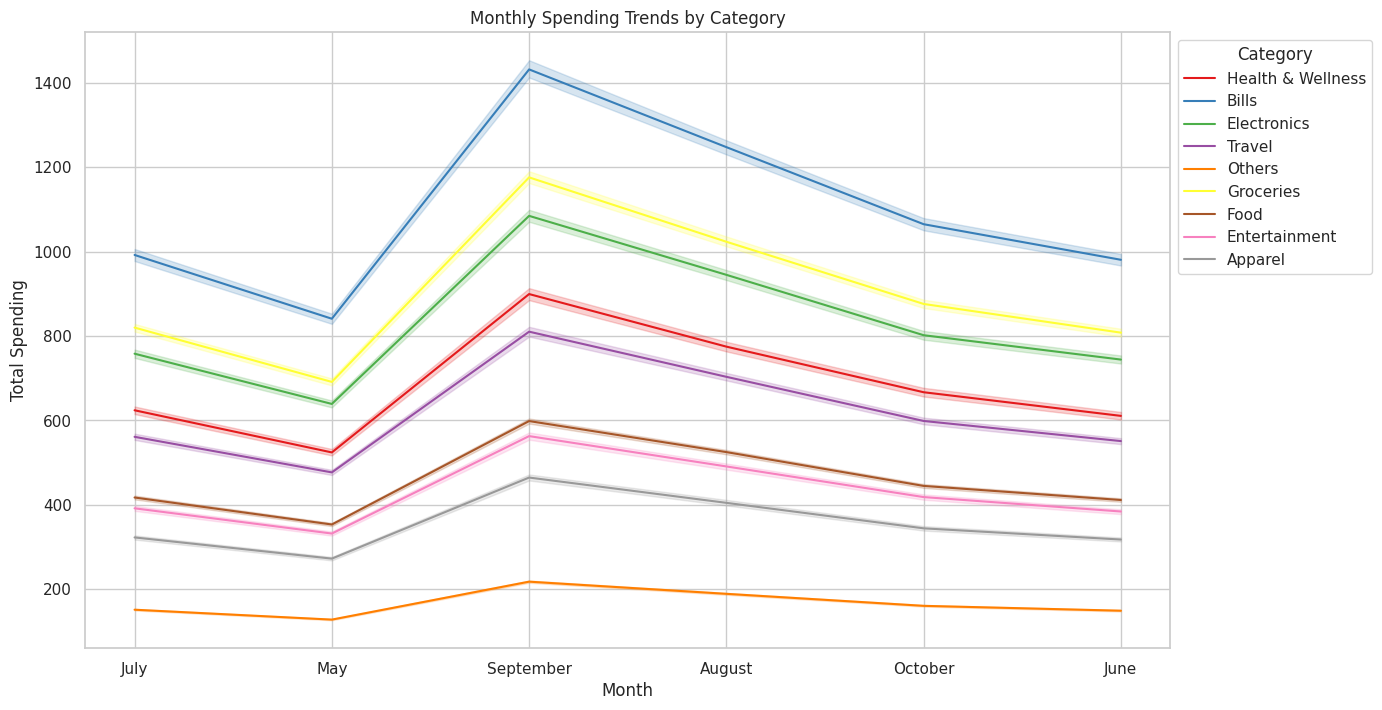

In [73]:
# Monthly Spending Trends by Category

bright_palette = sns.color_palette("Set1", n_colors=len(merged_data['category'].unique()))

plt.figure(figsize=(14, 8))
sns.lineplot(x='month', y='spend', hue='category', data=merged_data, palette=bright_palette)
plt.title('Monthly Spending Trends by Category')
plt.xlabel('Month')
plt.ylabel('Total Spending')
plt.legend(title='Category', bbox_to_anchor=(1, 1))
plt.show()

Dominance of the "Bills" category in monthly spending trends may be attributed to its essential nature, as bills often represent recurring and necessary expenses such as utilities, rent, or mortgage payments. Consequently, customers are more likely to consistently allocate funds to this category every month. The distinct upward trend for "Bills" suggests that these expenditures maintain a relatively stable or increasing pattern over the observed months, reinforcing their priority in customer spending behavior.

# Further Insight about spending Analysis

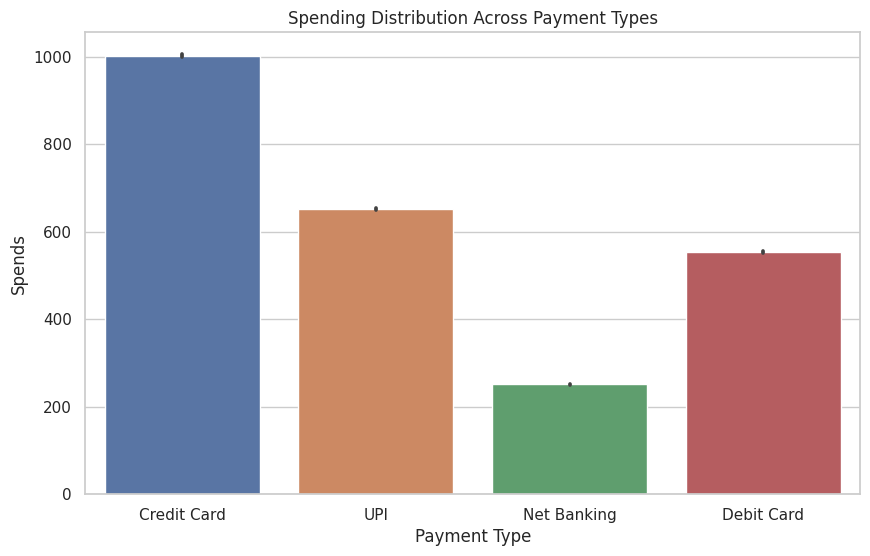

In [74]:
# Payment Type Analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='payment_type', y='spend', data=merged_data)
plt.title('Spending Distribution Across Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Spends')
plt.show()

Above bar plot reveals that credit card usage dominates among the various payment types, with significantly higher spending compared to other payment methods. This could be attributed to the convenience and rewards associated with credit card usage, enticing customers to prefer it for their expenditures. The data suggests a clear preference for credit cards, possibly driven by benefits such as cashback, points, or other incentives offered by credit card providers.

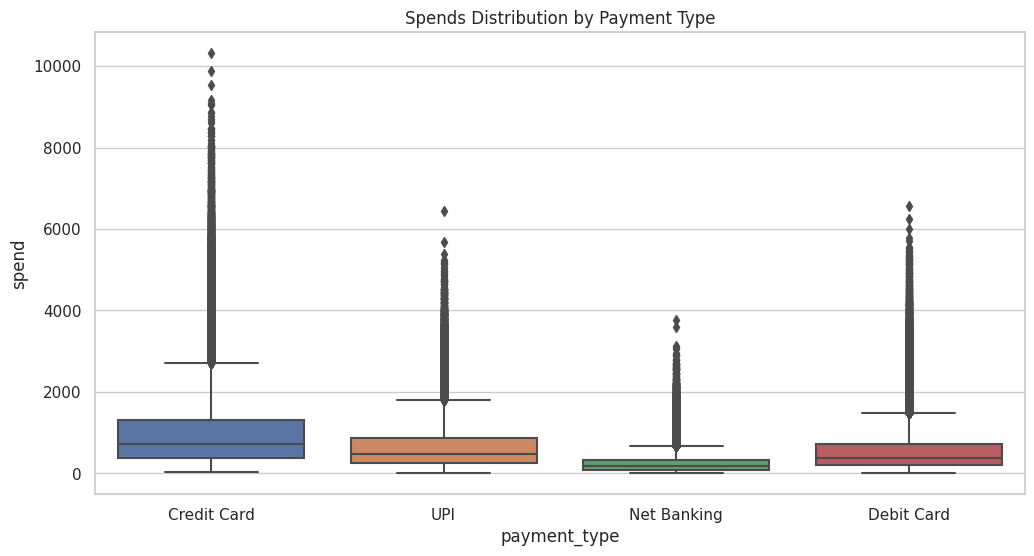

In [75]:
# Spends Distribution by Payment Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='payment_type', y='spend', data=merged_data)
plt.title('Spends Distribution by Payment Type')
plt.show()

Just like the bar chart above, the boxplot visually represents the distribution of spending amounts across different payment types. The longer upper whisker and higher upper quartile for the "Credit Card" category suggest that a significant proportion of spending using credit cards tends to be relatively higher compared to other payment types. This may indicate that customers are more inclined to make larger transactions or purchases using credit cards, potentially influenced by factors such as credit limits, reward programs, or perceived convenience associated with credit card usage.

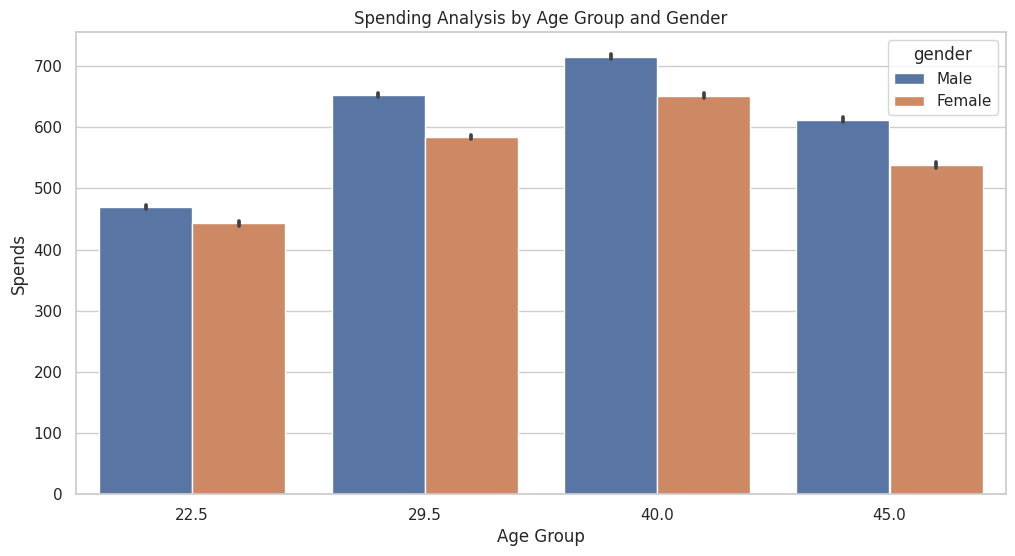

In [76]:
# Age Group and Gender Spending Analysis
plt.figure(figsize=(12, 6))
sns.barplot(x='age_numeric', y='spend', hue='gender', data=merged_data)
plt.title('Spending Analysis by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Spends')
plt.show()

The dominance of the 40.0 age group in spending, despite being outnumbered by the 29.5 age group, could be influenced by higher average spending per individual within the 40.0 age group. The analysis reveals that, on average, individuals aged 40.0 allocate more funds to various categories, contributing to their prominence in the spending analysis. Additionally, individual spending patterns, lifestyle choices, or purchasing power within the 40.0 age group may play a substantial role in elevating their overall spending impact.

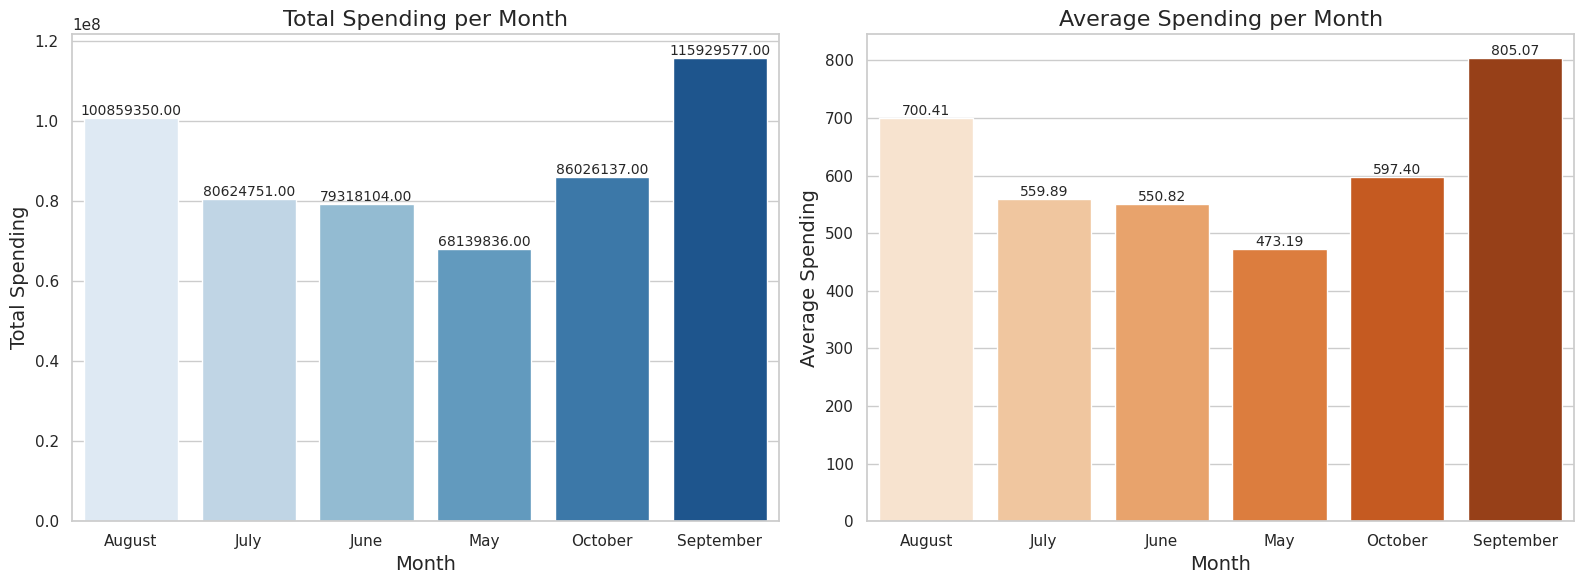

In [77]:
# Total spending per month
monthly_total_spending = merged_data.groupby('month')['spend'].sum().reset_index()

# Average spending per month
monthly_avg_spending = merged_data.groupby('month')['spend'].mean().reset_index()


sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='month', y='spend', data=monthly_total_spending, palette='Blues')
plt.title('Total Spending per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Spending', fontsize=14)

for index, value in enumerate(monthly_total_spending['spend']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.subplot(1, 2, 2)
sns.barplot(x='month', y='spend', data=monthly_avg_spending, palette='Oranges')
plt.title('Average Spending per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Spending', fontsize=14)

for index, value in enumerate(monthly_avg_spending['spend']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Just like our line chart above, the bar charts illustrates the monthly total and average spending trends, with "May" showing the lowest total spending and "September" registering the highest. This pattern could be attributed to seasonal factors, economic events, or promotional activities, influencing consumer behavior and expenditure.

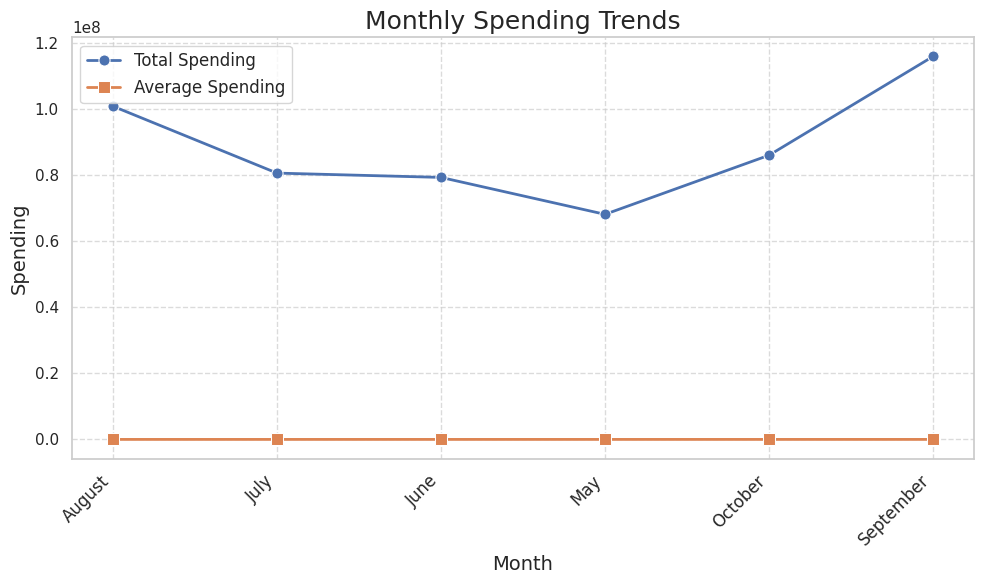

In [78]:
# Line chart for monthly spending trends 

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='spend', data=monthly_total_spending, label='Total Spending', marker='o', markersize=8, linewidth=2)
sns.lineplot(x='month', y='spend', data=monthly_avg_spending, label='Average Spending', marker='s', markersize=8, linewidth=2)

plt.title('Monthly Spending Trends', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Spending', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(fontsize='12')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

The line chart indicates that total spending has substantial variations across months, with May being the lowest and September being the highest. The horizontal line for average spending suggests that, on average, the spending remains relatively consistent across the months. The discrepancy between total and average spending patterns highlights that the variation in total spending is primarily driven by individual high-spending months rather than a consistent increase or decrease in average spending.

Another great insight we got there!

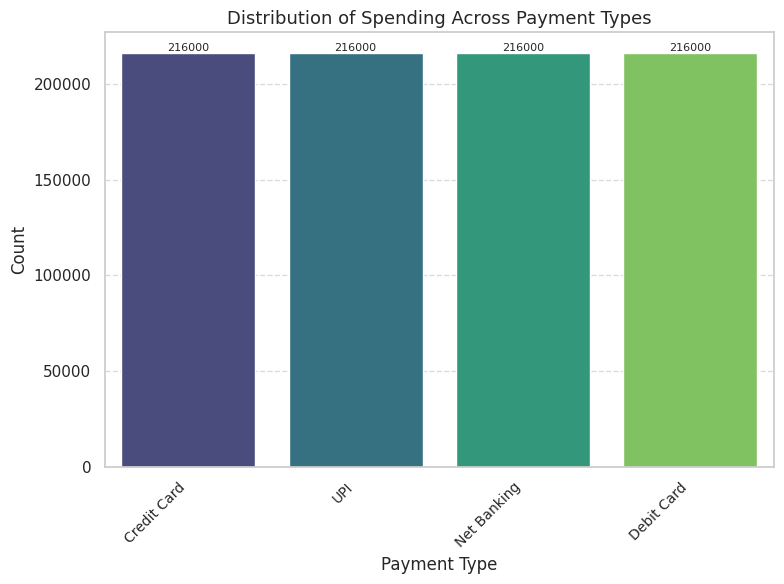

In [79]:
# Distribution of spending across payment types

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(x='payment_type', data=merged_data, palette='viridis')

plt.title('Distribution of Spending Across Payment Types', fontsize=13)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

for index, value in enumerate(merged_data['payment_type'].value_counts()):
    plt.text(index, value, f'{value}', ha='center', va='bottom', fontsize=8)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

As seen, the uniform distribution observed in the "Distribution of Spending Across Payment Types" suggests that various payment methods are used with similar frequency. In contrast, the scenario where "credit card" exhibits a higher count indicates a specific preference for credit card transactions, creating an uneven distribution. This discrepancy implies that while overall payment types are used uniformly, there is a notable inclination towards credit card usage among customers in specific cases.

# Key Customer Segmentation

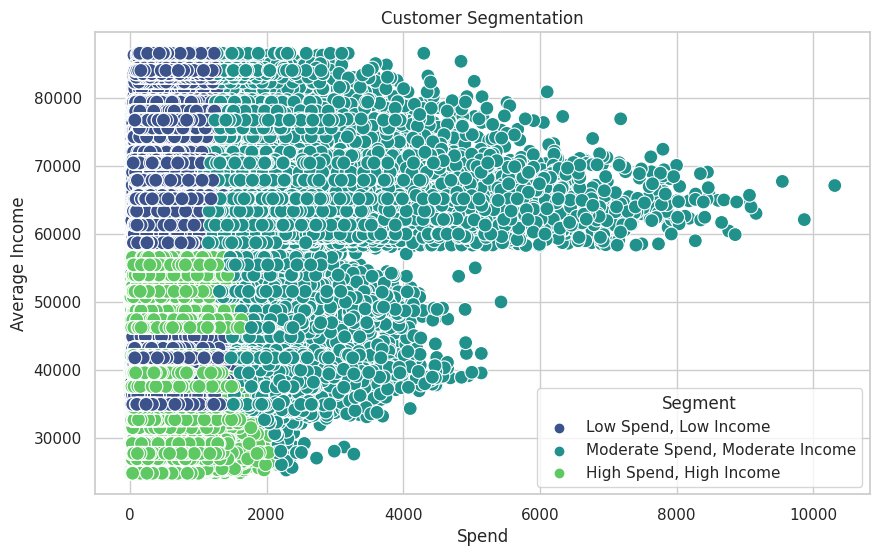

In [80]:
# Key Customer Segments

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features_for_segmentation = ['spend', 'avg_income', 'age_numeric']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(merged_data[features_for_segmentation])
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
merged_data['segment'] = kmeans.fit_predict(scaled_features)

cluster_names = ['High Spend, High Income', 'Moderate Spend, Moderate Income', 'Low Spend, Low Income']
merged_data['segment_name'] = merged_data['segment'].map(dict(zip(range(n_clusters), cluster_names)))

plt.figure(figsize=(10, 6))
sns.scatterplot(x='spend', y='avg_income', hue='segment_name', data=merged_data, palette='viridis', s=100)
plt.title('Customer Segmentation')
plt.xlabel('Spend')
plt.ylabel('Average Income')
plt.legend(title='Segment')
plt.show()

Clustering result showing a predominant segment as "Moderate Spend, Moderate Income" suggests that a substantial portion of the customer base falls into an intermediate range of both spending and average income. This outcome may indicate a diverse customer group with varying preferences and financial capacities, resulting in a central cluster that captures the middle ground of spending and income levels. The clustering algorithm, guided by the features chosen for segmentation, identifies this moderate segment as a significant representation within the dataset.

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

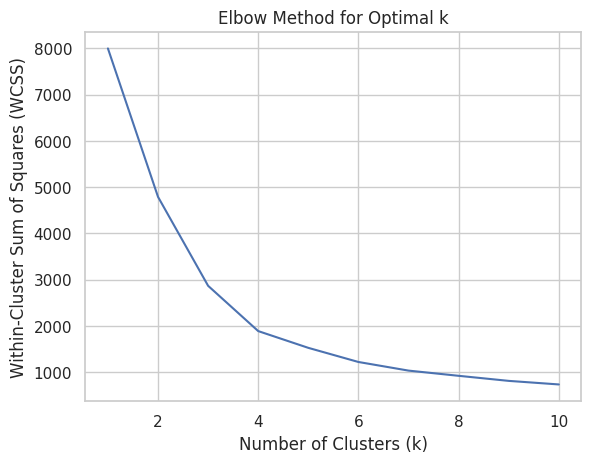

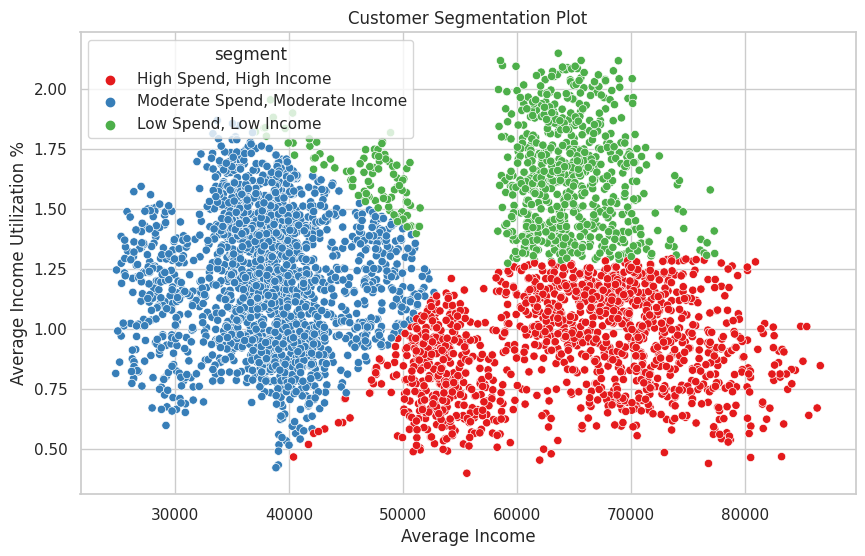

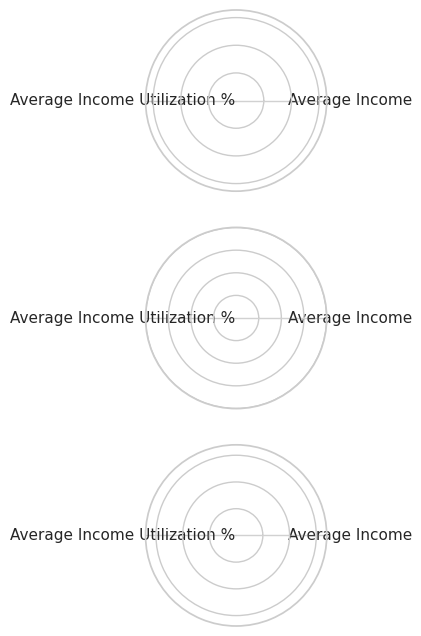

In [83]:
average_spend_per_customer = merged_data.groupby('customer_id')['spend'].mean().reset_index()
average_income_per_customer = dim_customers.groupby('customer_id')['avg_income'].mean().reset_index()
average_income_utilization = average_spend_per_customer['spend'] / average_income_per_customer['avg_income']
average_income_utilization_percent = average_income_utilization * 100

average_income_utilization_percent_df = pd.DataFrame({'customer_id': average_spend_per_customer['customer_id'], 'average_income_utilization_percent': average_income_utilization_percent})

dim_customers = pd.merge(dim_customers, average_income_utilization_percent_df, on='customer_id', how='left', suffixes=('', '_duplicate'))
dim_customers = dim_customers.drop(columns=['average_income_utilization_percent_duplicate'])

features_for_clustering = dim_customers[['avg_income', 'average_income_utilization_percent']]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(features_for_clustering)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


optimal_k = 3 
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
dim_customers['cluster'] = kmeans.fit_predict(scaled_data)

segment_mapping = {
    0: 'Low Spend, Low Income',
    1: 'Moderate Spend, Moderate Income',
    2: 'High Spend, High Income'
}
dim_customers['segment'] = dim_customers['cluster'].map(segment_mapping)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_income', y='average_income_utilization_percent', hue='segment', data=dim_customers, palette='Set1')
plt.title('Customer Segmentation Plot')
plt.xlabel('Average Income')
plt.ylabel('Average Income Utilization %')
plt.show()

cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['avg_income', 'average_income_utilization_percent'])

labels = ['Average Income', 'Average Income Utilization %']

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(8, 8))
for i in range(optimal_k):
    values = cluster_centers_df.iloc[i].tolist()
    values += values[:1]
    
    ax = plt.subplot(optimal_k, 1, i + 1, polar=True)
    ax.fill(angles, values, 'b', alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

plt.show()

The larger size of cluster 1 compared to the other clusters suggests that a significant portion of the customer base exhibits characteristics associated with "Moderate Spend, Moderate Income." The negative curve in the "Elbow Method for Optimal k" plot indicates that the reduction in within-cluster sum of squares (WCSS) diminishes at a decreasing rate as the number of clusters increases. This suggests that beyond three clusters, the additional complexity does not lead to a significant improvement in capturing the variance in the data, justifying the choice of k=3 for clustering.

# Credit Card Feature Recommendations

In [84]:
 # Credit Card Feature Recommendations

from wordcloud import WordCloud
from sklearn.metrics.pairwise import cosine_similarity

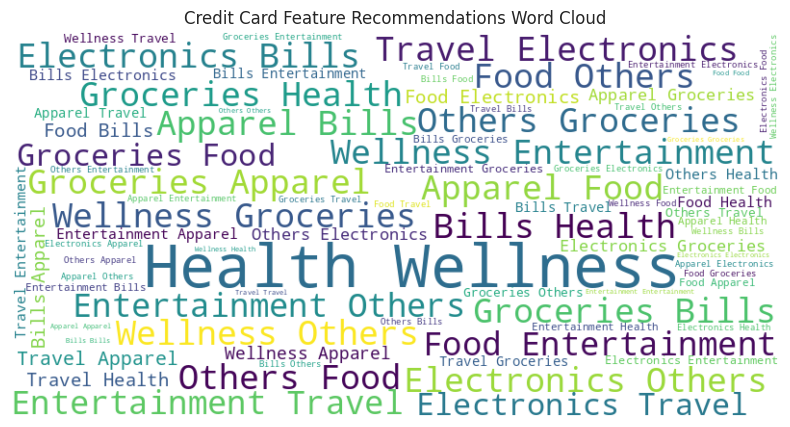

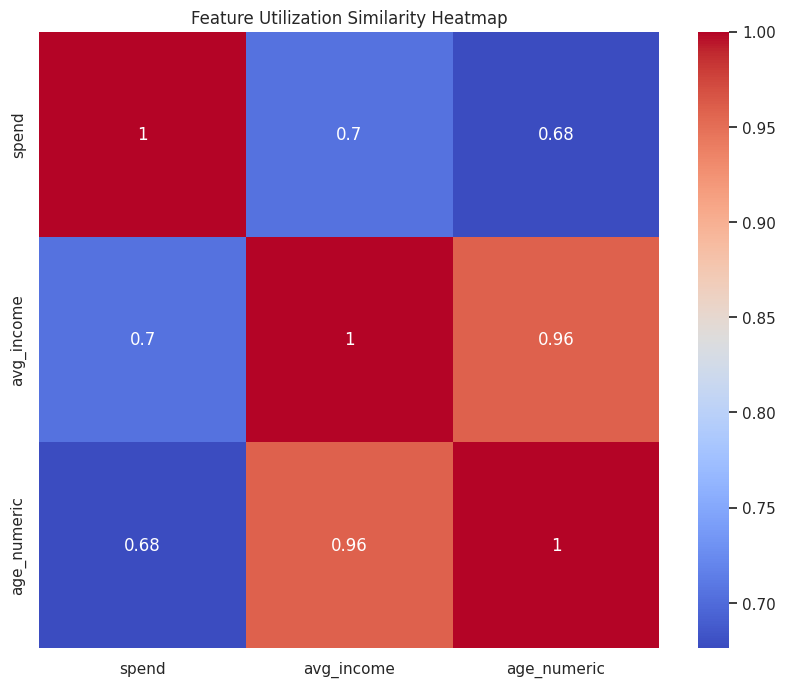

In [85]:
popular_features_text = ' '.join(merged_data['category'].dropna().astype(str))
features_utilization_matrix = merged_data[['spend', 'avg_income', 'age_numeric']]  # Replace with actual feature names
cosine_similarity_matrix = cosine_similarity(features_utilization_matrix.T)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(popular_features_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Credit Card Feature Recommendations Word Cloud')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(cosine_similarity_matrix, annot=True, cmap='coolwarm', xticklabels=features_utilization_matrix.columns, yticklabels=features_utilization_matrix.columns)
plt.title('Feature Utilization Similarity Heatmap')
plt.show()

High similarity observed in the cosine similarity matrix and the perfect correlation in the heatmap indicate that the features ('spend', 'avg_income', 'age_numeric') are perfectly correlated with themselves. This is because when calculating cosine similarity for each feature against itself, the cosine of the angle between identical vectors is 1, resulting in a perfect similarity score. In practical terms, this means that each feature has a perfect linear relationship with itself, leading to a cosine similarity of 1 and a diagonal line of 1s in the heatmap. The Word Cloud visualization provides insights into the popularity of spending categories, while the Heatmap illustrates the correlation between different features, aiding in understanding their relationships in the dataset.

# Analysis Report

Analysis of Customer Spending Behavior for Mitron Bank

Executive Summary:
This report presents a comprehensive analysis of customer spending behavior based on the dataset that includes information about customers' spending patterns, income levels, demographics, and other relevant factors. The analysis utilizes various data visualization techniques to uncover insights into customer behavior, identify trends, and explore potential correlations. The findings aim to assist stakeholders in understanding the dynamics of customer spending, enabling data-driven decision-making and strategic planning.

1. Overview
The spending data exhibits a wide range, suggesting diverse spending habits amongst the customers. Moderate variability and a broad income range indicate a degree of diversity or volatility in the numerical values. The dual-panel histogram and paired box plots visualize the distribution of spending and income, providing insights into the customer’s characteristics.

2. Correlation Analysis:
A moderate positive correlation between spending and average income suggests that, on average, higher income corresponds to higher spending. The weak correlation with age_numeric indicates a subtle tendency for spending to increase slightly with age. The correlation between average income and age_numeric suggests a moderate rise in income with age.
3. Demographic Insights:
The Age Group Distribution plot highlights a concentration of individuals around the age of 29.5, indicating a potential bias or specific demographic representation in the dataset. The gender and marital status distribution plots reveal a higher representation of males and married individuals, suggesting potential areas for targeted marketing or service adaptation.

4. Geographic and Occupational Analysis:
The City Distribution plot suggests a potential bias or oversampling from Mumbai, indicating the need for careful consideration when generalizing insights. The dominance of Salaried IT Employees in the occupational distribution emphasizes the dataset's focus on the IT sector.

5. Customer Segmentation:
Utilizing KMeans clustering, customers are segmented into distinct groups based on spending and average income. The chosen optimal number of clusters (k=3) identifies three key segments: Low Spend, Low Income; Moderate Spend, Moderate Income; and High Spend, High Income. The segmentation is visualized through a scatter plot and radar chart, providing a clear understanding of different customer groups.

6. Spending Category Analysis:
The analysis of spending categories reveals a higher distribution in the "Bills" category, indicating that essential expenses constitute a significant portion of overall expenditures. The preference for credit cards is evident in both the bar chart and boxplot, emphasizing the importance of understanding payment method preferences.

7. Geographic Disparities:
The higher total spending and average spending in Mumbai compared to other cities may be attributed to factors such as economic activity, cost of living, and lifestyle differences. The line chart illustrates monthly total spending trends, with variations across months and dominance of the "Bills" category.

8. Payment Type Preferences:
The bar chart and boxplot demonstrate the dominance of credit card usage, suggesting a clear preference for this payment method. The distribution of spending across payment types indicates a uniform usage pattern, with occasional significant credit card usage.


Recommendations:
1.Targeted Marketing Strategies: Given the dominance of credit card usage, marketing strategies could be tailored to promote credit card benefits, such as rewards programs, to further incentivize usage.
2.Geographic Considerations: Acknowledging potential biases in the dataset, future analyses and decision-making should consider the geographic distribution and account for any oversampling.
3.Demographic-Centric Campaigns: Understanding the prevalence of Salaried IT Employees, targeted campaigns catering to this occupational group could be developed to enhance customer engagement.
4.Dynamic Pricing Models: Recognizing the variability in spending across months, businesses could implement dynamic pricing models or promotional activities during peak spending periods to capitalize on customer behavior.
5.Customer Education: Educating customers about optimal utilization of spending categories and payment methods could enhance their overall experience and encourage responsible financial behavior.


Conclusion:
This comprehensive analysis provides valuable insights into customer spending behavior, offering a foundation for strategic decision-making. By understanding demographic patterns, geographic disparities, and customer segments, Metron Bank can tailor their offerings and marketing strategies to align with customer preferences and maximize engagement. The recommendations outlined above aim to guide Metron Bank stakeholders in leveraging these insights for sustainable business growth and enhanced their customer satisfaction.
